# Winequality dataset

## Feim els imports

In [81]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Preparam el dataset

Funció que separa les features i les etiquetes, escalant les dades

In [82]:
def load_data(df):
    y=df.quality
    X=df.drop('quality',1)
    X = min_max_scaler.fit_transform(X)
    return X, y

Carregam els datasets a dos dataframes a partir dels fitxers csv: winequality-red.csv i winequality-white.csv

Afegim una nova columna que indiqui el tipus de vi a cada dataset i juntam els dos datasets en un de nou

In [83]:
#CREATE AND MERGE DATAFRAMES
dfRed=pd.read_csv("winequality-red.csv", sep=";")
dfWhite=pd.read_csv("winequality-white.csv", sep=";")

dfRed['Type']="Red"
dfWhite['Type']="White"
df=pd.concat([dfRed,dfWhite])

Consultam les files del dataframe amb valors absents i les eliminam

In [84]:
df[df.isna().any(axis=1)]
df.dropna(inplace=True)

Convertim els valors categòrics en númerics

In [85]:
labelencoder = LabelEncoder()

df['Type']=labelencoder.fit_transform(df['Type'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 685.2 KB


In [87]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Mesclam el dataframe i carregam les dades a les variables "X" (features) i "y" (etiquetes)

In [88]:
min_max_scaler = preprocessing.MinMaxScaler()
df = df.sample(frac=1)

X, y = load_data(df)


C:\Users\sanso\AppData\Local\Temp/ipykernel_8948/3104105429.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop('quality',1)


### Separació del conjunt d'entrenament i el de test
Per separar les dades en els conjunts d'entrenament i de test hem emprat la funció train_test_split

Hem decidit emprar un 80% entrenament i un 20% de test ja que  amb un valor més baix d'entrenament el model de regressió logistica i el del perceptró presentaven underfiting 


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

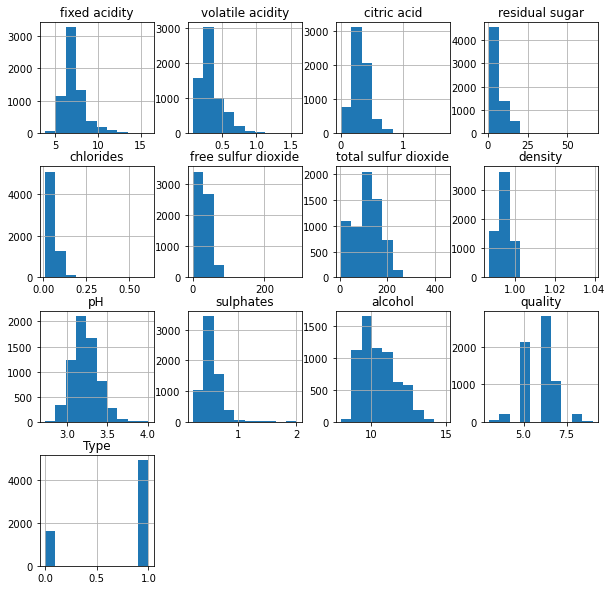

In [90]:
df.hist(figsize=(10,10))

([<matplotlib.patches.Wedge at 0x1af7ee7a940>,
 [Text(-0.7872560039826877, 0.7682629655223598, 'White'),
  Text(0.7872559680177021, -0.7682630023764719, 'Red')])

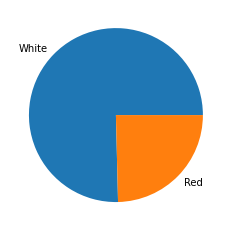

In [91]:
plt.pie(df['Type'].value_counts(), labels = ["White","Red"])

## Correlacions entre les columnes
Aquí podem observar les correlacions entre els distints atributs

C:\Users\sanso\AppData\Local\Temp/ipykernel_8948/2184500784.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfwithoutType = df.drop('Type',1)


[Text(0, 0, 'fixed acidity'),
 Text(0, 1, 'volatile acidity'),
 Text(0, 2, 'citric acid'),
 Text(0, 3, 'residual sugar'),
 Text(0, 4, 'chlorides'),
 Text(0, 5, 'free sulfur dioxide'),
 Text(0, 6, 'total sulfur dioxide'),
 Text(0, 7, 'density'),
 Text(0, 8, 'pH'),
 Text(0, 9, 'sulphates'),
 Text(0, 10, 'alcohol'),
 Text(0, 11, 'quality')]

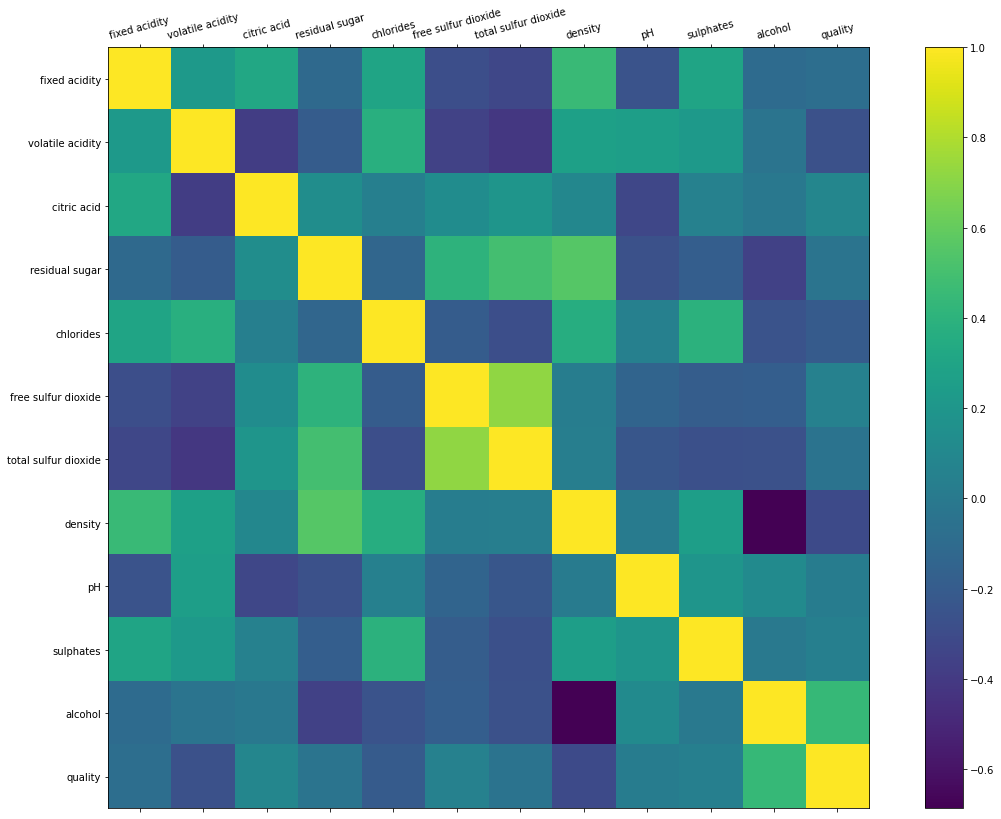

In [119]:
dfwithoutType = df.drop('Type',1)
fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot(111)
cax = ax.matshow(dfwithoutType.corr())
fig.colorbar(cax)

ax.xaxis.set_ticks(np.arange(len(dfwithoutType.columns)))
ax.yaxis.set_ticks(np.arange(len(dfwithoutType.columns)))
ax.set_xticklabels([item[:len(item)] for item in dfwithoutType.columns], rotation=15)
ax.set_yticklabels(dfwithoutType.columns)

In [93]:
#LOGISTIC REGRESSION

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train)

y_predict = logreg.predict(X_test)

print(classification_report(y_test, y_predict))

training_accuracy = logreg.score(X_train,y_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = logreg.score(X_test,y_test)
print('testing_accuracy:',testing_accuracy)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        43
           5       0.62      0.61      0.62       458
           6       0.52      0.76      0.62       543
           7       0.56      0.16      0.25       213
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.24      0.22      0.21      1300
weighted avg       0.53      0.56      0.52      1300

training_accuracy: 0.5399268808928228
testing_accuracy: 0.5576923076923077


C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
#PERCEPTRON
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

y_predict=perceptron.predict(X_test)

print(classification_report(y_test, y_predict))

training_accuracy = perceptron.score(X_train,y_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = perceptron.score(X_test,y_test)
print('testing_accuracy:',testing_accuracy)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        43
           5       0.61      0.16      0.26       458
           6       0.44      0.94      0.60       543
           7       0.00      0.00      0.00       213
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.45      1300
   macro avg       0.15      0.16      0.12      1300
weighted avg       0.40      0.45      0.34      1300

training_accuracy: 0.4758514527612084
testing_accuracy: 0.45153846153846156


C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
#RANDOM FOREST
rf = RandomForestClassifier(max_depth=14)
rf.fit(X_train, y_train)

y_predict=rf.predict(X_test)

print(classification_report(y_test, y_predict))

training_accuracy = rf.score(X_train,y_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = rf.score(X_test,y_test)
print('testing_accuracy:',testing_accuracy)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.75      0.07      0.13        43
           5       0.73      0.71      0.72       458
           6       0.62      0.78      0.69       543
           7       0.67      0.48      0.56       213
           8       0.93      0.37      0.53        35
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.53      0.35      0.38      1300
weighted avg       0.68      0.67      0.65      1300

training_accuracy: 0.9749855685972677
testing_accuracy: 0.6684615384615384


C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanso\.conda\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
